# Predict sales with known $p, q, M$

Bass model predicts the already adopters and the new adopters in period $t$ are
$$\hat{A}(t) = M\cdot\frac{1-exp(-(p+q)t)}{1+\frac{q}{p}exp(-(p+q)t)}$$ <br>
$$\hat{N}(t) = \hat{A}(t)-\hat{A}(t-1) \newline
= M\cdot\frac{1-exp(-(p+q)t)}{1+\frac{q}{p}exp(-(p+q)t)}-M\cdot\frac{1-exp(-(p+q)(t-1))}{1+\frac{q}{p}exp(-(p+q)(t-1))}$$ <br>
$p$: innovation coefficient <br>
$q$: imitation coefficient <br>
$M$: market size <br>

So, given the values of $p, q, M$, we can predict  $\hat{A}(t)$ and $\hat{N}(t)$ for any time period $t$.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Define the $\hat{A}(t)$ and $\hat{N}(t)$ functions

In [7]:
# define A_hat(t) -- predicted already adopters
def A_hat(t,p,q,M):  
    return M * (1 - np.exp(-(p+q)*t))/(1 + q / p * np.exp(-(p+q)*t))

# define N_hat(t)  --- predicted new adopters
def N_hat(t,p,q,M):  
    return A_hat(t,p,q,M) - A_hat(t-1,p,q,M)  # We can use the A_hat function instead of manually typing the formula again

In [8]:
# Example: predict numbers of already/new adopters in period 5 with p=0.03, q=0.4, and M=20
print(A_hat(5,0.03,0.4,20) , N_hat(5,0.03,0.4,20)) 


6.921062184723377 2.0742898450973497


## Plot predictions

In [7]:
p_test = 0.03
q_test = 0.15
M_test = 100
T = 30  # number of periods for prediction
predictA = [A_hat(t,p_test,q_test,M_test) for t in range(1,T+1)]  # predict already adopters for T periods
predictN = [N_hat(t,p_test,q_test,M_test) for t in range(1,T+1)]  # predict already adopters for T periods

In [44]:
# Example: find the period with the fastest adoption (i.e., when N(t) is the largest)
predictN.index(max(predictN)) + 1  # Python starts counting from 0 

7

Text(0.5, 0, 'time')

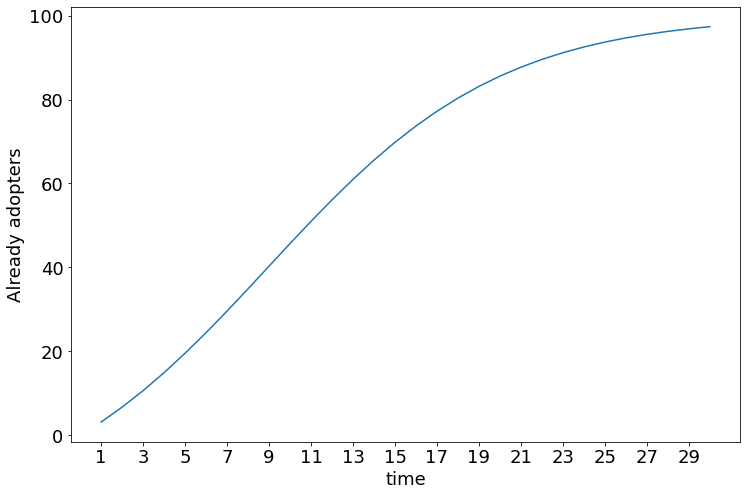

In [8]:
# Plot the trajectory of already adopters
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,8]  # set figure size to be 12*8 inch
plt.plot(range(1,T+1),predictA)
plt.xticks(range(1,T+1,2), fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel("Already adopters",fontsize = 18)
plt.xlabel("time", fontsize = 18)

Text(0.5, 0, 'time')

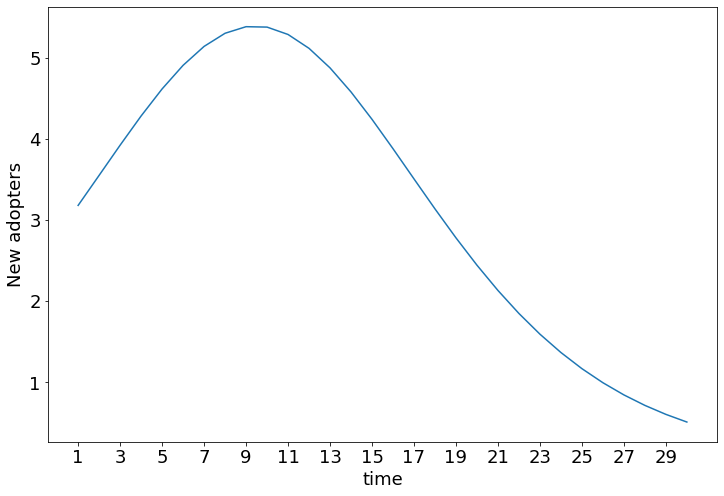

In [10]:
# Plot the trajectory of new adopters

plt.rcParams['figure.figsize'] = [12,8]  # set figure size to be 12*8 inch
plt.plot(range(1,T+1),predictN)
plt.xticks(range(1,T+1,2), fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel("New adopters",fontsize = 18)
plt.xlabel("time", fontsize = 18)